# Introduction

Manifold learning is a subfield of machine learning that deals with learning the underlying structure of high-dimensional data. In this lab, we will apply different manifold learning techniques on a spherical dataset. We will use dimensionality reduction to gain some intuition regarding the manifold learning methods.

# Import Libraries

We will begin by importing the necessary libraries. We will be using scikit-learn, matplotlib, and numpy.

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

import mpl_toolkits.mplot3d

# Create Spherical Dataset

Next, we will create a spherical dataset. We will create a sphere, sever the poles, and a thin slice down its side. This will enable the manifold learning techniques to 'spread it open' whilst projecting it onto two dimensions.

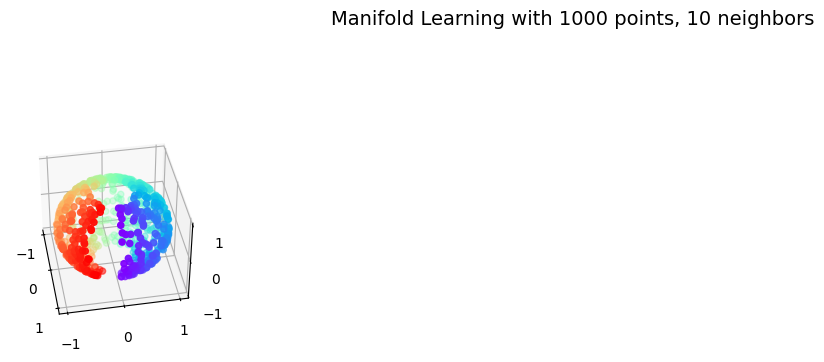

In [2]:
n_neighbors = 10
n_samples = 1000

random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold Learning

We will now perform Locally Linear Embedding (LLE) manifold learning. LLE is a powerful technique that can unfold complicated manifolds with a small number of samples. We will use four variations of LLE and compare their results.

standard: 0.056 sec
ltsa: 0.26 sec
hessian: 0.17 sec
modified: 0.36 sec


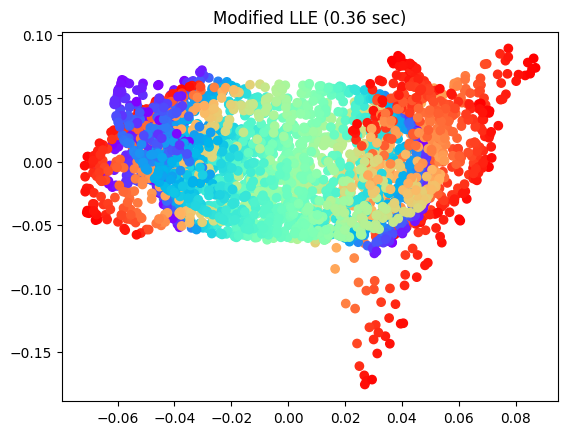

In [3]:
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold Learning

Next, we will perform Isomap manifold learning. Isomap is a nonlinear dimensionality reduction technique that seeks a lower-dimensional embedding of the data that maintains geodesic distances between all pairs of points.

ISO: 0.13 sec


(-2.102726160269736,
 2.1611787468232286,
 -1.6159409090543824,
 1.6634384523595571)

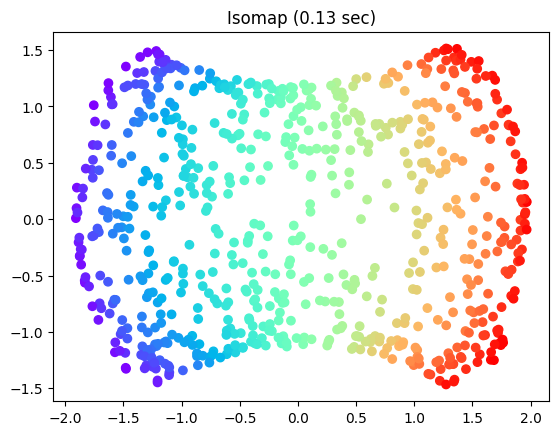

In [4]:
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional Scaling (MDS)

We will now perform Multi-dimensional Scaling (MDS) manifold learning. MDS is a technique that seeks a low-dimensional representation of the data in which the distances between points respect the distances in the original high-dimensional space.

MDS: 1.3 sec


(-1.229602337123303,
 1.2597678694838759,
 -1.2599617497131437,
 1.265563800908537)

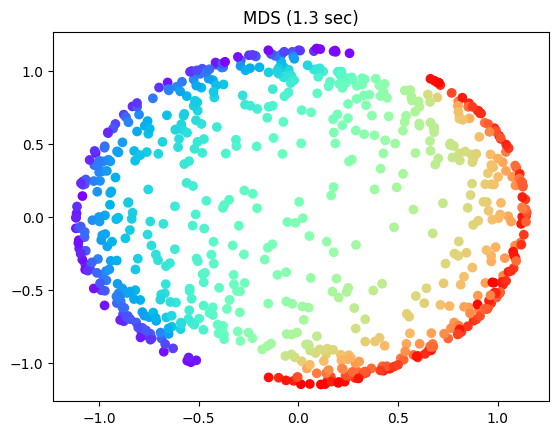

In [5]:
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, normalized_stress="auto")
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding

Next, we will perform Spectral Embedding manifold learning. Spectral Embedding is a technique that seeks a low-dimensional representation of the data that preserves pairwise distances between the points.

Spectral Embedding: 0.078 sec


(-0.019561400533921018,
 0.020986937321592118,
 -0.021241575164588924,
 0.02375716628727367)

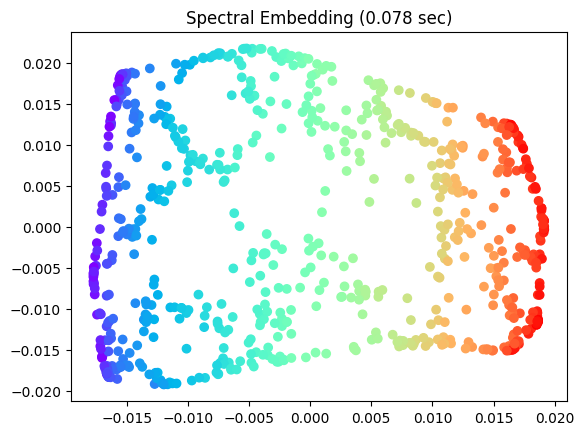

In [6]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed Stochastic Neighbor Embedding (t-SNE)

Finally, we will perform t-distributed Stochastic Neighbor Embedding (t-SNE) manifold learning. t-SNE is a technique that seeks a low-dimensional representation of the data that preserves local distances between the points.

t-SNE: 1.6 sec


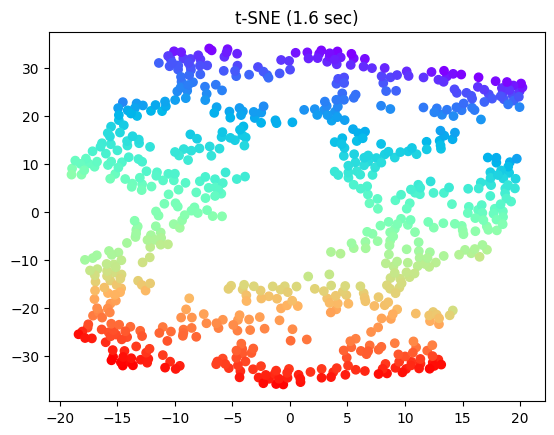

In [7]:
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

# Summary

In this lab, we applied different manifold learning techniques on a spherical dataset. We used Locally Linear Embedding (LLE), Isomap, Multi-dimensional Scaling (MDS), Spectral Embedding, and t-distributed Stochastic Neighbor Embedding (t-SNE) to gain some intuition regarding the manifold learning methods. These techniques are useful for analyzing and visualizing high-dimensional data.